<a href="https://colab.research.google.com/github/LuisSilvaS/Machine_Learning/blob/main/HOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(512, 512, 3)


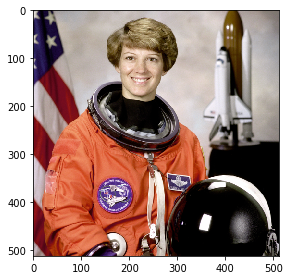

In [1]:
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure, data
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
%matplotlib inline


#carregar imagem de dataset publico
img = data.astronaut()
imshow(img)
print(img.shape)

(64, 64, 3)


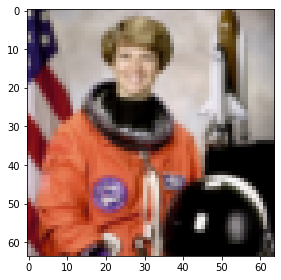

In [2]:
#reduzir a imagem
resized_img = resize(img, (64,64)) 
imshow(resized_img) 
print(resized_img.shape)

(64, 64)


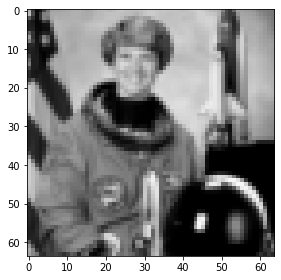

In [3]:
grayscale = rgb2gray(resized_img)
imshow(grayscale) 
print(grayscale.shape)



variar a quantidade de atributos

*   pixels_per_cell=(8, 8),



In [4]:
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)

In [5]:
fd.shape

(1764,)

In [6]:
print(fd)

[0.30219722 0.05150391 0.02092915 ... 0.06046679 0.02393115 0.19647616]


In [22]:
import numpy as np
import matplotlib.pyplot as plt 
from skimage import data
from PIL import Image
import math

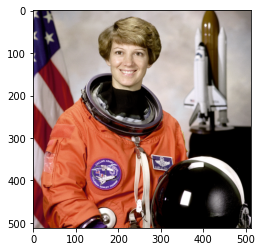

In [23]:
  image = data.astronaut()
plt.imshow(image, cmap='gray')

In [24]:
def convert_to_gray(image, luma=False):
    if luma:
        params = [0.299, 0.589, 0.114]
    else:
        params = [0.2125, 0.7154, 0.0721]    
    gray_image = np.ceil(np.dot(image[...,:3], params))
 
    # Saturando os valores em 255
    gray_image[gray_image > 255] = 255
    
    return gray_image

In [26]:
def instantiate_histogram():    
    hist_array= []
    
    for i in range(0,256):
        hist_array.append(str(i))
        hist_array.append(0)
    
    hist_dct = {hist_array[i]: hist_array[i + 1] for i in range(0, len(hist_array), 2)} 
    
    return hist_dct
histogram = instantiate_histogram()

In [27]:
def count_intensity_values(hist, img):
    for row in img:
        for column in row:
            hist[str(int(column))] = hist[str(int(column))] + 1
     
    return hist
histogram = count_intensity_values(histogram, image)


TypeError: ignored

In [13]:
def plot_hist(hist, hist2=''):
    if hist2 != '':
        figure, axarr = plt.subplots(1,2, figsize=(20, 10))
        axarr[0].bar(hist.keys(), hist.values())
        axarr[1].bar(hist2.keys(), hist2.values())
    else:
        plt.bar(hist.keys(), hist.values())
        plt.xlabel("Níveis intensidade")
        ax = plt.gca()
        ax.axes.xaxis.set_ticks([])
        plt.grid(True)
        plt.show()